# [KDD Cup|Humanities Track Tutorial](https://compete.hexagon-ml.com/tutorial/kdd-cuphumanities-track-tutorial/)
This notebook by Oetbent

This Tutorial exposes participants on approaches to learn a sequence of intervention based decisions (Actions) from a malaria modelling environment. We'll introduce notions of State, Action and Reward, in order to descibe some approaches to this challenge.

### 1. State

Observations for the challenge models occur over a 5 year timeframe and each year of this timeframe may be considered as the State of the system. With the possiblity to take one Action for each State. While it should also be noted this temporal State transition is fixed and as such not dependant on the Action taken.

$S \in \{1,2,3,4,5\}$


### 2.Action
Consider Actions as a combination of only two possibile interventions i.e. Insecticide spraying(IRS) and distributing bed nets(ITN) based on our model description. $a_{ITN} \in [0,1]$ and $a_{IRS} \in [0,1]$. Action values between O and 1 describe a coverage range of the intervention for a simulated human population.

$A_S = [a_{ITN},a_{IRS}]$

### 3. Reward
A reward function determines a Stochastic Reward for a Policy over the entire episode, this function acts to determine the Health outcomes per unit cost for the interventions implementated in the policy. In order to have a notion of goodness maximising the Reward we negate this value.

$R_{\pi} \in (- \infty,\infty)$

![](image/reward.png)

### Policy
Therefore a Policy($\pi$) for this challenge consists of a temporal sequence of Actions, defined in the code as:

In [1]:
policies = []
policy = {}

policy['1']=[.55,.7]
policy['2']=[0,0]
policy['3']=[0,0]
policy['4']=[0,0]
policy['5']=[0,0]

policies.append(policy)
print(policies)

[{'1': [0.55, 0.7], '2': [0, 0], '3': [0, 0], '4': [0, 0], '5': [0, 0]}]


In [2]:
import os
from sys import exit, exc_info, argv
import random
import numpy as np
import pandas as pd

In [3]:
from netsapi.challenge import *

In [4]:
np.random.random()

0.3826527826484064

## Evaluating Policies as a Stochastic Multi-armed Bandit
#### Evaluating Policies as a Sequence of Actions :
In this section, we run several experiments with the same Policy and visualize the Rewards to indicate the stochasticity with MatPlotLib visualisations
#### Evaluating a single known Policy
Let's start with a current intervention campaign 55% ITN and 70% IRS coverage and obtain our reward.

In [5]:
print(policies[0]['1']) #Action in Year 1

env = ChallengeEnvironment() #Initialise Challenge Environment
reward = env.evaluateReward(np.asarray(policies[0]['1'])) #This has been negated and any reward should be maximised

print(reward)

[0.55, 0.7]
100  Evaluations Remaining
12.823093473278048


#### Update to Sequential Decision Environment

In [6]:
len(policies[0])

5

In [7]:
envSeqDec = ChallengeSeqDecEnvironment() #Initialise a New Challenge Environment to post entire policy
reward = envSeqDec.evaluatePolicy(policies[0]) #Action in Year 1 only

print(reward)

105  Evaluations Remaining
11.901774423220179


#### Observing Stochastic Rewards for a single policy

Let's repeat evaluations for the policy above and visualise the rewards as a boxplot (MatPlotLib may be required but you are free to visualise the data how you see fit)

In [8]:
rewards = [reward]
for i in range(10):   
    reward = envSeqDec.evaluatePolicy(policies[0])
    rewards = np.append(rewards, reward)
    
print(rewards)

100  Evaluations Remaining
95  Evaluations Remaining
90  Evaluations Remaining
85  Evaluations Remaining
80  Evaluations Remaining
75  Evaluations Remaining
70  Evaluations Remaining
65  Evaluations Remaining
60  Evaluations Remaining
55  Evaluations Remaining
[11.90177442 13.36358867 11.72014716 13.1181866  12.82731799 11.85733358
 12.23737287 13.90853502 13.2274433  12.92281704 11.83851124]


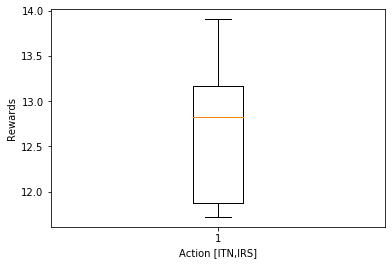

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.boxplot(rewards)
plt.xlabel('Action [ITN,IRS]')
plt.ylabel('Rewards')

plt.show()

#### Evaluating Policies as a Sequence of Actions

High performing Policies may also be found through framing this as a sequential decision making problem and so this may be extended to the reinforcement learning paradigm as described above. Rewards can be returned for each state, action pair. Observations are the simplest case and only the year in which the decision is being made, rewards may be observed based on an action taken in each state in the sequence.

In [10]:
episode_count = 1 

reward = 0
for i in range(episode_count):
    envSeqDec.reset()
    episodic_reward = 0

    while True:
        
        #Agent Training Code here
        action = [abs(np.sin(reward)),abs(np.cos(reward))] 
        envSeqDec.policy[str(envSeqDec.state)] = action 
        
        ob, reward, done, _ = envSeqDec.evaluateAction(action)
        print('reward',reward)
        episodic_reward += reward
        
        if done:
            break
    
    policies.append(envSeqDec.policy)
    print('policy', envSeqDec.policy)
    print('episodic_reward', episodic_reward)

50  Evaluations Remaining
reward 107.8042281045328
49  Evaluations Remaining
reward 64.2318973431749
48  Evaluations Remaining
reward -4.90426821405277
47  Evaluations Remaining
reward 50.01122119781535
46  Evaluations Remaining
reward 106.54085755450535
policy {'1': [0.0, 1.0], '2': [0.8360687093919419, 0.5486247471411517], '3': [0.9854572537025449, 0.16992351551518167], '4': [0.9816475913493243, 0.19070397583183726], '5': [0.2515304879200584, 0.9678493754953285]}
episodic_reward 323.6839359859756


## Generating a Submission file
#### Description of Submission Process
Please do not alter the methods outside of the generate() method. This code is open for your own Agent implementation. The submission file to be scored and generated is based on 10 runs of 20 episodes in which a policy of 5 actions is run, this meets the 1000 evaluations constraint of the initialised environment. When you package your code for evaluation it will be required that you maintain this style.

In [11]:
from sys import exit, exc_info, argv
import numpy as np
import pandas as pd

from netsapi.challenge import *

class CustomAgent:
    def __init__(self, environment):
        self.environment = environment

    def generate(self):
        best_policy = None
        best_reward = -float('Inf')
        candidates = []
        try:
            # Agents should make use of 20 episodes in each training run, if making sequential decisions
            for i in range(20):
                self.environment.reset()
                policy = {}
                for j in range(5): #episode length
                    policy[str(j+1)]=[np.random.random(),np.random.random()]
                candidates.append(policy)
            print("candidates=",candidates)    4
            rewards = self.environment.evaluatePolicy(candidates)
            best_policy = candidates[np.argmax(rewards)]
            best_reward = rewards[np.argmax(rewards)]
        
        except (KeyboardInterrupt, SystemExit):
            print(exc_info())
            
        return best_policy, best_reward

In [12]:
EvaluateChallengeSubmission(ChallengeSeqDecEnvironment, CustomAgent, "tutorial.csv")

candidates= [{'1': [0.7303643228229579, 0.5841321969958546], '2': [0.526973932789097, 0.4300779236905893], '3': [0.21922680746034306, 0.32338109639421697], '4': [0.0016503807594634434, 0.3115221640903054], '5': [0.041019400824165886, 0.5504381653152702]}, {'1': [0.8797234128407297, 0.13744347780065436], '2': [0.8623364102203231, 0.29065902674137845], '3': [0.2545749031213438, 0.5879652768326634], '4': [0.7498316563473756, 0.44762370477919156], '5': [0.6221562559458413, 0.769866650887284]}, {'1': [0.10173063763429391, 0.6023653724927637], '2': [0.37564945047622444, 0.14966916352292903], '3': [0.847017941979447, 0.6507090044860787], '4': [0.5693255697701046, 0.08624564450603223], '5': [0.7534656892167155, 0.9091615893753359]}, {'1': [0.11511725963099617, 0.523368882927214], '2': [0.1957522009364866, 0.7071848919041263], '3': [0.6452717733290372, 0.48938921748135067], '4': [0.9814817640302462, 0.3498380999575037], '5': [0.021562369128206416, 0.5015273243398584]}, {'1': [0.9073547379584017

candidates= [{'1': [0.9324726018832823, 0.27098888442031777], '2': [0.7068998090581474, 0.4051955050199828], '3': [0.09006264173651524, 0.20167356907539524], '4': [0.36661159248354347, 0.3150329101649678], '5': [0.9697362113106673, 0.5883690439010455]}, {'1': [0.36483580184777453, 0.2926513722502698], '2': [0.49314531688009755, 0.3650668175874272], '3': [0.35435784183180563, 0.17562737355261793], '4': [0.18346886230050752, 0.9273927593139872], '5': [0.13249196509513683, 0.7079616823275958]}, {'1': [0.17704618431622055, 0.11067190446426678], '2': [0.5749986862516102, 0.4245151555693396], '3': [0.5367323211254919, 0.3663804748125603], '4': [0.8694181230961588, 0.11838451867060773], '5': [0.5807198221703812, 0.804889143497336]}, {'1': [0.1947010675302553, 0.8041249607323567], '2': [0.8215637193267743, 0.4797267779670614], '3': [0.17399501658520844, 0.9439498429660692], '4': [0.6694134972122876, 0.7413102049143918], '5': [0.4860771584289947, 0.6721537902137281]}, {'1': [0.36121697898710514

candidates= [{'1': [0.9409409523884396, 0.7777481061150006], '2': [0.22729925045881194, 0.22294797298528413], '3': [0.7776377942051022, 0.15371760179025762], '4': [0.11134577625851516, 0.027313260122572625], '5': [0.29670310252521637, 0.6391044421488615]}, {'1': [0.42685842424067244, 0.9131012395006342], '2': [0.28755180527598057, 0.18014151907563647], '3': [0.2535737758614067, 0.8966565589336744], '4': [0.9213520457815695, 0.18482724521593996], '5': [0.7627902122061215, 0.7354439991827061]}, {'1': [0.7424367386709155, 0.8987316985256243], '2': [0.045753270538327895, 0.7656398421696224], '3': [0.11484504821704089, 0.48675630675700365], '4': [0.4655576028383044, 0.6879110908878269], '5': [0.6690008870473817, 0.11350558230508367]}, {'1': [0.07121146731074879, 0.8608398532452219], '2': [0.7262184550781077, 0.27731594476331833], '3': [0.5595147914312752, 0.6716570039680227], '4': [0.5305227053083562, 0.7078951978351307], '5': [0.5463226340335827, 0.18882552516402928]}, {'1': [0.36261691769

candidates= [{'1': [0.6185604471908336, 0.2645757471895709], '2': [0.6998751123479956, 0.7279654687659143], '3': [0.5259754717312489, 0.16650261668008848], '4': [0.9196060716265531, 0.3829248221437862], '5': [0.18833600584573895, 0.2843159034670165]}, {'1': [0.7569442322441935, 0.7507751281120593], '2': [0.41826348141326075, 0.7155625937077996], '3': [0.8776236166912599, 0.6334237952203307], '4': [0.8855046891426026, 0.49756649219220683], '5': [0.11427694684574652, 0.0046814713264063945]}, {'1': [0.5175503076066379, 0.1453919326127987], '2': [0.5936684676556812, 0.6442998755151342], '3': [0.31335872335116743, 0.32269015826628467], '4': [0.4508506945781302, 0.21723049191189536], '5': [0.08470034265822601, 0.6573340033566424]}, {'1': [0.6049734245733293, 0.033412996058609035], '2': [0.5157089291638214, 0.17553669483673406], '3': [0.3889543130488746, 0.17691465571841603], '4': [0.7232206877543004, 0.6773727785062399], '5': [0.6381704236673695, 0.9701852618787999]}, {'1': [0.22896125037200

candidates= [{'1': [0.6872705554035016, 0.5680472917098079], '2': [0.21955505234678363, 0.613466173763428], '3': [0.41354295729554946, 0.017307470575228523], '4': [0.4627916053807306, 0.4132447112302646], '5': [0.43220151678818464, 0.4349901200568679]}, {'1': [0.3231256992262568, 0.4380362859007316], '2': [0.24933908948595274, 0.46092527316028753], '3': [0.4882227433822466, 0.6119563372981891], '4': [0.9537163863364145, 0.3036627525557225], '5': [0.7078159109869132, 0.4725722660309425]}, {'1': [0.09210385261742082, 0.9168755006483967], '2': [0.28807749046480646, 0.16377830141417316], '3': [0.8593892178008237, 0.4205696652271267], '4': [0.22601638793014678, 0.12468596955551103], '5': [0.8765293526752473, 0.3951384709648029]}, {'1': [0.5309610230196128, 0.25931098248206286], '2': [0.6607271882314311, 0.6092262114261111], '3': [0.5691917083992832, 0.5066091876653034], '4': [0.9802119187449227, 0.19222769071999934], '5': [0.8269051005854638, 0.13415681482133468]}, {'1': [0.3074896665732944

177.69990598837734
